In [19]:
import pandas as pd
import numpy as np
import warnings 
warnings.simplefilter("ignore",UserWarning)

In [20]:
churn_data = pd.read_excel("Fitness Club Data.xlsx")
churn_data.head()

,enrolldt,price,downpmt,monthdue,pmttype,use,age,gender,default
0,19970101,2178.85,250.00,6.0,4,1,0,2,0
1,19970101,1543.65,1543.65,6.0,1,0,0,2,0
2,19970101,1107.67,125.00,5.0,1,0,0,2,0
3,19970102,950.44,237.61,9.0,5,0,0,1,0
4,19970103,1436.00,250.00,9.0,3,0,0,2,0


# 1. Calculate basic stats descriptive statistics (mean, median, min, max, standard deviation) for each field 

In [21]:
churn_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
enrolldt,24843.0,1.997814e+07,6825.852430,19970101.0,19970825.0,19980326.0,19981008.0,19990331.00
price,24843.0,1.003659e+03,439.224768,0.0,699.0,999.0,1249.0,9371.25
downpmt,24843.0,1.998245e+02,335.437237,0.0,49.0,100.0,175.0,9371.25
monthdue,24843.0,8.287290e+00,7.108381,0.0,5.5,6.0,9.0,120.00
pmttype,24843.0,3.093225e+00,1.560034,1.0,1.0,3.0,4.0,5.00
use,24843.0,1.944371e+00,2.315550,0.0,0.0,1.0,3.0,8.00
age,24843.0,2.920332e+01,13.277721,0.0,22.0,28.0,36.0,99.00
gender,24843.0,1.498007e+00,0.500006,1.0,1.0,1.0,2.0,2.00
default,24843.0,1.150425e-01,0.319080,0.0,0.0,0.0,0.0,1.00


In [22]:
churn_data.shape

(24843, 9)

In [23]:
churn_data.dtypes

enrolldt      int64
price       float64
downpmt     float64
monthdue    float64
pmttype       int64
use           int64
age           int64
gender        int64
default       int64
dtype: object

In [24]:
# Domain Knowledge 
# Eliminate customers above 17 and below 79
churn_data = churn_data[churn_data["age"].between(17,79)]

churn_data['year'] = churn_data['enrolldt'].astype(str).str[:4]
churn_data["year"] = pd.to_numeric(churn_data["year"])
churn_data = churn_data[churn_data["year"]<=1998]

churn_data = churn_data.drop(["enrolldt","year"],axis=1)
churn_data

# 用between连，别再写两段subset了

,price,downpmt,monthdue,pmttype,use,age,gender,default
2241,2175.00,400.00,5.50,3,0,17,2,0
2242,551.05,459.03,28.89,1,6,17,2,0
2243,1838.19,100.00,5.86,1,0,17,2,1
2244,2175.00,2175.00,6.00,1,0,17,1,0
2245,1464.44,1464.44,11.00,1,0,17,1,0
...,...,...,...,...,...,...,...,...
24818,1023.00,175.00,7.00,5,1,79,1,0
24819,774.00,50.00,7.00,5,0,79,1,0
24820,1198.00,100.00,23.00,4,1,79,2,0
24821,651.63,651.63,34.00,3,0,79,1,0


In [25]:
churn_data["downpmt_percent"] = churn_data.downpmt/churn_data.price
churn_data["downpmt_percent"] = churn_data.downpmt_percent.round(2)
churn_data

,price,downpmt,monthdue,pmttype,use,age,gender,default,downpmt_percent
2241,2175.00,400.00,5.50,3,0,17,2,0,0.18
2242,551.05,459.03,28.89,1,6,17,2,0,0.83
2243,1838.19,100.00,5.86,1,0,17,2,1,0.05
2244,2175.00,2175.00,6.00,1,0,17,1,0,1.00
2245,1464.44,1464.44,11.00,1,0,17,1,0,1.00
...,...,...,...,...,...,...,...,...,...
24818,1023.00,175.00,7.00,5,1,79,1,0,0.17
24819,774.00,50.00,7.00,5,0,79,1,0,0.06
24820,1198.00,100.00,23.00,4,1,79,2,0,0.08
24821,651.63,651.63,34.00,3,0,79,1,0,1.00


In [26]:
churn_data.isnull().sum(axis=0)
#axis=1指按rows
#default是0指按columns 

price               0
downpmt             0
monthdue            0
pmttype             0
use                 0
age                 0
gender              0
default             0
downpmt_percent    24
dtype: int64

In [27]:
churn_data["downpmt_percent"] = churn_data["downpmt_percent"].fillna(np.mean(churn_data["downpmt_percent"]))

In [28]:
churn_data.isnull().sum(axis=0)
#check again if it's dropped or replaced 

price              0
downpmt            0
monthdue           0
pmttype            0
use                0
age                0
gender             0
default            0
downpmt_percent    0
dtype: int64

In [29]:
churn_data["use"].value_counts(normalize=True)
#加了normalize=True换成比例  
#等同于 churn_data["use"].value_counts()/(churn_data["use"].size)

0    0.438576
1    0.217805
6    0.097195
3    0.084396
4    0.052240
5    0.040377
7    0.033665
2    0.022790
8    0.012956
Name: use, dtype: float64

# 2. Visualize distributions of data elements using histograms for key variables and predict which variables you expect to be most correlated with default/churn. 

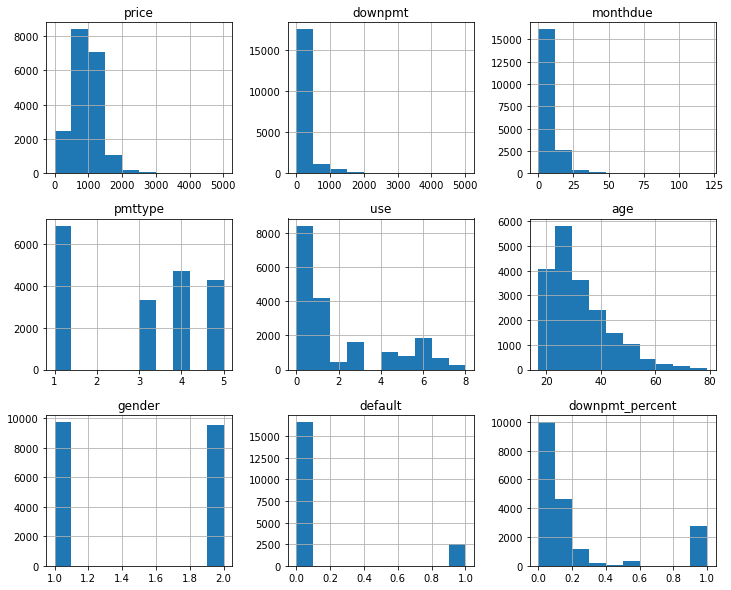

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,10));
ax = fig.gca();
churn_data.hist(ax=ax);

#matplot可以直接画出所有attribute distribution，很实用

#可以看出都不是Normal distribution

In [31]:
churn_data.corr()

,price,downpmt,monthdue,pmttype,use,age,gender,default,downpmt_percent
price,1.000000,0.149157,-0.111337,0.180095,-0.077660,-0.022741,0.019071,0.062459,-0.286442
downpmt,0.149157,1.000000,-0.015324,-0.259712,0.024845,0.206793,0.001489,-0.184587,0.778218
monthdue,-0.111337,-0.015324,1.000000,-0.064751,0.041915,0.008093,-0.005456,-0.046729,0.097690
pmttype,0.180095,-0.259712,-0.064751,1.000000,0.134275,-0.006148,0.035993,-0.305234,-0.376455
use,-0.077660,0.024845,0.041915,0.134275,1.000000,0.048435,-0.108853,-0.250650,0.064254
age,-0.022741,0.206793,0.008093,-0.006148,0.048435,1.000000,-0.005767,-0.129946,0.226207
gender,0.019071,0.001489,-0.005456,0.035993,-0.108853,-0.005767,1.000000,-0.044569,-0.007883
default,0.062459,-0.184587,-0.046729,-0.305234,-0.250650,-0.129946,-0.044569,1.000000,-0.213816
downpmt_percent,-0.286442,0.778218,0.097690,-0.376455,0.064254,0.226207,-0.007883,-0.213816,1.000000


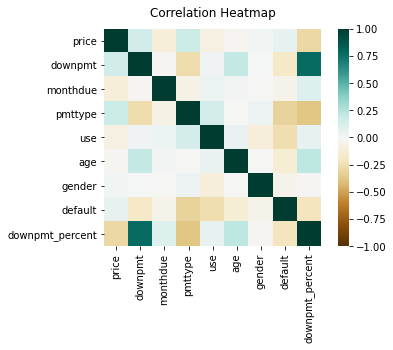

In [32]:
import seaborn as sns;
corr_heatmap = sns.heatmap(churn_data.corr(),vmin=-1, vmax=1,cmap='BrBG',square=True)
corr_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# vim=-1,vmax=1 指把值的范围调成-1到1，默认是根据原表的min和max
# cmap="BrBG" 是调颜色成这个哈密瓜色，cmap="seismic"这个比较old-school，也可
# square=True把格子长宽调成一样的

In [33]:
# Create dummy variables虚拟变量(哑变量)
churn_data = pd.get_dummies(churn_data,columns=["pmttype","use"],drop_first=True,prefix =["pmttype","use"])                                        
churn_data

# 很重要！把看起来是int,其实是categorical的variable,建立dummy variable的原因在于这些变量并没有数值上的意义

,price,downpmt,monthdue,age,gender,default,downpmt_percent,pmttype_3,pmttype_4,pmttype_5,use_1,use_2,use_3,use_4,use_5,use_6,use_7,use_8
2241,2175.00,400.00,5.50,17,2,0,0.18,1,0,0,0,0,0,0,0,0,0,0
2242,551.05,459.03,28.89,17,2,0,0.83,0,0,0,0,0,0,0,0,1,0,0
2243,1838.19,100.00,5.86,17,2,1,0.05,0,0,0,0,0,0,0,0,0,0,0
2244,2175.00,2175.00,6.00,17,1,0,1.00,0,0,0,0,0,0,0,0,0,0,0
2245,1464.44,1464.44,11.00,17,1,0,1.00,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24818,1023.00,175.00,7.00,79,1,0,0.17,0,0,1,1,0,0,0,0,0,0,0
24819,774.00,50.00,7.00,79,1,0,0.06,0,0,1,0,0,0,0,0,0,0,0
24820,1198.00,100.00,23.00,79,2,0,0.08,0,1,0,1,0,0,0,0,0,0,0
24821,651.63,651.63,34.00,79,1,0,1.00,1,0,0,0,0,0,0,0,0,0,0


In [34]:
y = churn_data["default"]
X = churn_data.drop("default",axis=1)
#在这drop是一个很好的方法 

In [35]:
# train_test_splitt
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y,test_size = 0.2,random_state = 0)

# random_state = 0 --- controlling the shuffling, use for reproducible output
# stratify = y 为了保持split前类的分布,将stratify=y就是按照y中的比例分配 

In [37]:

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 101)
X_balanced, y_balanced = smote.fit_resample(X_train, y_train)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print('After OverSampling, the shape of train_X: {}'.format(X_balanced.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_balanced.shape))
 
print("After OverSampling, counts of label '1': {}".format(sum(y_balanced == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_balanced == 0)))


Before OverSampling, counts of label '1': 2094
Before OverSampling, counts of label '0': 13281 

After OverSampling, the shape of train_X: (26562, 17)
After OverSampling, the shape of train_y: (26562,) 

After OverSampling, counts of label '1': 13281
After OverSampling, counts of label '0': 13281


In [18]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform (X_test)

# 3. Build a Logistic Regression Model to Predict Churn/Retention, you may choose to identify groups within the data to narrow your focus on. (The "default" variable = churn, you may choose to only use age and payment type to build a model to predict "default" = churn) 

In [114]:
# Create a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# Fit the model with data
logreg.fit(X_train,y_train)

# Predict
y_pred = logreg.predict(X_test)

In [115]:
logreg.predict_proba(X_test)

array([[2.28087951e-01, 7.71912049e-01],
       [9.99999855e-01, 1.44507085e-07],
       [3.22711673e-01, 6.77288327e-01],
       ...,
       [9.99957415e-01, 4.25850446e-05],
       [8.22100120e-01, 1.77899880e-01],
       [5.21620788e-01, 4.78379212e-01]])

In [116]:
from collections import Counter
Counter(y_pred)

Counter({1: 390, 0: 3454})

# 4. Display the output visually using charts of your choosing and explain your choice. (ROC Curve, Confusion Matrix, Gains Table) 

In [117]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("The confusion matrix is \n \n"),confusion_matrix(y_test,y_pred)

The confusion matrix is 
 



(None,
 array([[3230,  137],
        [ 224,  253]], dtype=int64))

confusion matrix tells TN, TP, FP, TN so that we can calculate the classifier: accuracy, recall, precision. Depend on the business goal, I will adjust to maximize different classifier. Assume our goal is to suggest applying payment strategy, accuracy will be the primary one we want to maximize. 

In [118]:
print("The classification table is \n \n",classification_report(y_test,y_pred))

The classification table is 
 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      3367
           1       0.65      0.53      0.58       477

    accuracy                           0.91      3844
   macro avg       0.79      0.74      0.77      3844
weighted avg       0.90      0.91      0.90      3844



In [119]:
    # create a ROC curve
    from sklearn import metrics
    y_pred_proba = logreg.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_proba)

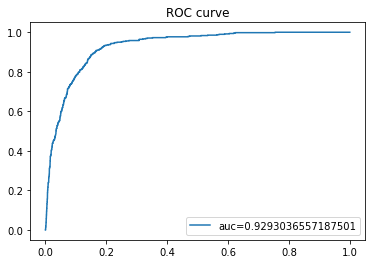

In [120]:
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label = "auc="+str(auc))
plt.legend(loc=4)
plt.title("ROC curve")
plt.show()

ROC plots TPR vs FPR and shows the tradeoff. A decreased TPR is bad due to detecting fewer positive. A decreased FPR is good due to fewer false positives.  

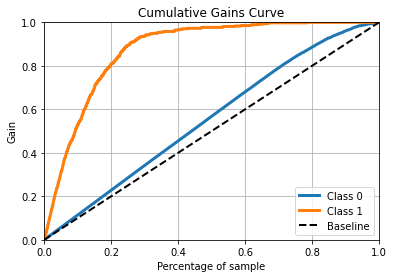

In [121]:
import scikitplot
scikitplot.metrics.plot_cumulative_gain(y_test,logreg.predict_proba(X_test))
plt.show()


The Gains Table shows the percentage of the overall number of cases in a given category "gained" by targeting a percentage of the total number of cases. It reflects and measures how much better one can expect to do with the predictive model comparing without a model.

In [122]:
# Getting the best coefficients
feature_imp = logreg.coef_
coef_table = pd.DataFrame({"feature_names":X.columns,"Beta":feature_imp[0],"AbsBeta":abs(feature_imp[0])})
# Get the sorted values
coef_table = coef_table.sort_values(by = "AbsBeta",ascending=False)
print("The most important features in the model are: \n")
coef_table

The most important features in the model are: 



,feature_names,Beta,AbsBeta
1,downpmt,-2.466148,2.466148
7,pmttype_4,-1.656988,1.656988
5,downpmt_percent,-1.445198,1.445198
14,use_6,-1.252727,1.252727
8,pmttype_5,-1.200925,1.200925
15,use_7,-1.145862,1.145862
13,use_5,-0.734552,0.734552
16,use_8,-0.703707,0.703707
12,use_4,-0.607391,0.607391
11,use_3,-0.488431,0.488431


According to this outcome, the feature "downpmt" is the most important indicator which I did not expect. I thought I was payment type because of the strongest correlation in the heatmap. And it makes no sense to me that customers who paid more downpayment will be the ones who are likely to churn. And it makes a lot of sense that the pmttype_4 which should be pay with coupon book are the second most important feature because those customers are likely to be attracted by the promoting price, or just the gift given by their friends.

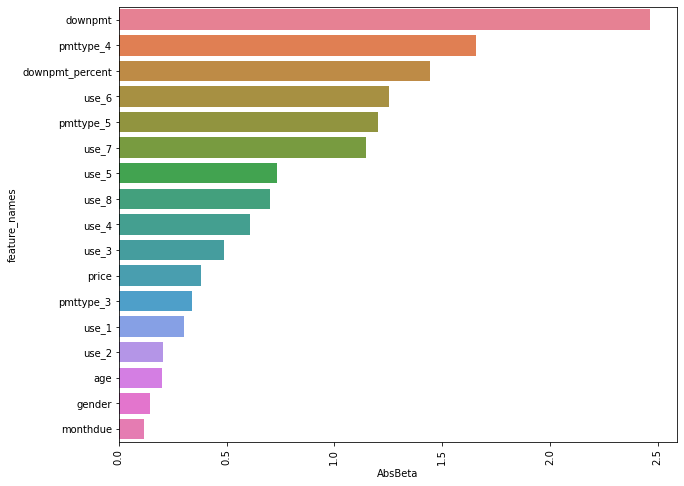

In [123]:
plt.figure(figsize=(10,8));
sns.barplot(x=coef_table['AbsBeta'],y=coef_table['feature_names'],palette="husl");
plt.xticks(rotation=90);

In [1]:



coconut = 1.29
coc_num = 6
walnut = 11.99
walnut_num = 1 

total = coconut * coc_num, + walnut*walnut_num


NameError: name 'coc_nu' is not defined

In [ ]:
def total